In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

In [40]:
# Read Excel file 
data = pd.read_excel("QVI_transaction_data.xlsx")
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [41]:
# Format DATE 
data['DATE'] = pd.to_datetime(data['DATE'], origin='1899-12-30', unit='D')
data['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [42]:
# Verify products
def count_word(data,column):
    data_products = data[column].unique()
    # Split words
    product_words = [word for phrase in data_products for word in phrase.split()]
    # Remove special characters from each word
    product_words_cleaned = [re.sub(r'[^a-zA-Z]', '', word) for word in product_words]
    # Count the frequency of each cleaned word
    word_counts = Counter(product_words_cleaned)
    # Sort the distinct words by frequency of occurrence
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_words

count_word(data,'PROD_NAME')

[('g', 105),
 ('Chips', 21),
 ('', 17),
 ('Smiths', 16),
 ('Crinkle', 14),
 ('Cut', 14),
 ('Kettle', 13),
 ('Cheese', 12),
 ('Salt', 12),
 ('Original', 10),
 ('Chip', 9),
 ('Salsa', 9),
 ('Doritos', 9),
 ('Corn', 8),
 ('Pringles', 8),
 ('RRD', 8),
 ('Chicken', 7),
 ('WW', 7),
 ('Chilli', 6),
 ('Sour', 6),
 ('Sea', 6),
 ('Thinly', 5),
 ('Vinegar', 5),
 ('Thins', 5),
 ('Crisps', 5),
 ('Natural', 4),
 ('Cream', 4),
 ('Red', 4),
 ('Rock', 4),
 ('Deli', 4),
 ('Supreme', 4),
 ('Infuzions', 4),
 ('CCs', 3),
 ('Tortilla', 3),
 ('Old', 3),
 ('El', 3),
 ('Paso', 3),
 ('Dip', 3),
 ('Tomato', 3),
 ('Mild', 3),
 ('Sweet', 3),
 ('Sensations', 3),
 ('Lime', 3),
 ('Twisties', 3),
 ('Chives', 3),
 ('Soy', 3),
 ('Cobs', 3),
 ('Popd', 3),
 ('Woolworths', 3),
 ('Tostitos', 3),
 ('Nacho', 2),
 ('Grain', 2),
 ('Waves', 2),
 ('G', 2),
 ('Tangy', 2),
 ('Burger', 2),
 ('Rings', 2),
 ('Cheezels', 2),
 ('And', 2),
 ('Thai', 2),
 ('BBQ', 2),
 ('SR', 2),
 ('Swt', 2),
 ('French', 2),
 ('ChipCo', 2),
 ('Smith', 2),


In [43]:
# Remove non-chips products
data_only_chips = data[~data['PROD_NAME'].str.contains('salsa', case=False)]

C:\Users\morva\AppData\Local\Temp\ipykernel_29800\2246565778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_only_chips.sort_values(by="DATE", inplace=True)


<Axes: xlabel='DATE'>

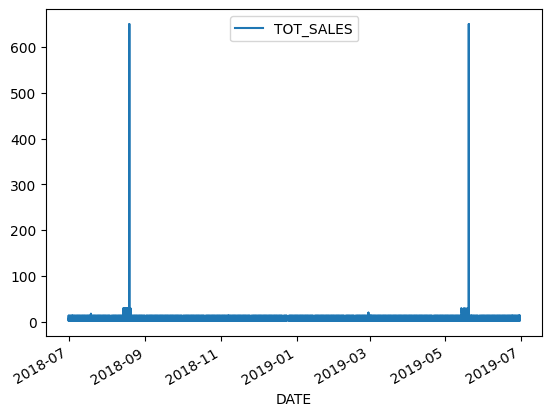

In [44]:
# Looking for outliers
data_only_chips.sort_values(by="DATE", inplace=True)
data_only_chips.plot(x="DATE", y="TOT_SALES")

In [45]:
# Data on outliers
outliers = data_only_chips[data_only_chips['TOT_SALES'] > 100]
outliers


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [46]:
# Searching for other transactions 
outliers_client = data_only_chips[data_only_chips['LYLTY_CARD_NBR'] == 226000]
outliers_client

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [47]:
# Searching for missing data
min_date = data_only_chips['DATE'].min()
max_date = data_only_chips['DATE'].max()

all_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = all_dates[~all_dates.isin(data_only_chips['DATE'])]
missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

In [48]:
# Remove outliers
outliers = data_only_chips['TOT_SALES']>100
data_without_outliers = data_only_chips[~outliers]
data_without_outliers = data_without_outliers.dropna()
data_without_outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
136301,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
157526,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4
126416,2018-07-01,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2
121423,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken 134g,2,7.4
73583,2018-07-01,97,97164,97311,92,WW Crinkle Cut Chicken 175g,2,3.4
...,...,...,...,...,...,...,...,...
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6
231677,2019-06-30,84,84116,83704,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
186851,2019-06-30,24,24115,20917,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8
13810,2019-06-30,199,199117,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8


In [49]:
# Extract PACK SIZE
data_without_outliers['PACK_SIZE'] = data_without_outliers['PROD_NAME'].str.extract(r'(\d+)[Gg]').astype(int)
data_without_outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
136301,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175
157526,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150
126416,2018-07-01,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150
121423,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken 134g,2,7.4,134
73583,2018-07-01,97,97164,97311,92,WW Crinkle Cut Chicken 175g,2,3.4,175
...,...,...,...,...,...,...,...,...,...
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,175
231677,2019-06-30,84,84116,83704,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170
186851,2019-06-30,24,24115,20917,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8,170
13810,2019-06-30,199,199117,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170


In [50]:
# Create Brand name column 
data_without_outliers['BRAND'] = data_without_outliers['PROD_NAME'].str.split().str[0]
data_without_outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
136301,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,Smiths
157526,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,Red
126416,2018-07-01,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150,Smith
121423,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken 134g,2,7.4,134,Pringles
73583,2018-07-01,97,97164,97311,92,WW Crinkle Cut Chicken 175g,2,3.4,175,WW
...,...,...,...,...,...,...,...,...,...,...
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,175,Thins
231677,2019-06-30,84,84116,83704,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,Doritos
186851,2019-06-30,24,24115,20917,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8,170,Smiths
13810,2019-06-30,199,199117,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,Doritos


In [51]:
data_without_outliers['BRAND'].unique()

array(['Smiths', 'Red', 'Smith', 'Pringles', 'WW', 'Cheezels', 'Infzns',
       'Thins', 'Infuzions', 'Kettle', 'Cobs', 'Tyrrells', 'Doritos',
       'RRD', 'Grain', 'Cheetos', 'CCs', 'Twisties', 'Tostitos',
       'Natural', 'NCC', 'Dorito', 'GrnWves', 'French', 'Sunbites',
       'Burger', 'Snbts', 'Woolworths'], dtype=object)

In [54]:
# Check for similarities
from difflib import get_close_matches

brands = data_without_outliers['BRAND'].unique()

similar_brands = {}
for brand in brands:
    similar_brands[brand] = get_close_matches(brand, brands, n=5, cutoff=0.6)

visited = set()

for brand, similar in similar_brands.items():
    if brand not in visited:
        if len(similar) > 1:
            print(f"{brand}: {similar}")
            visited.add(brand)
            for s in similar:
                visited.add(s)

Cheezels: ['Cheezels', 'Cheetos']
Doritos: ['Doritos', 'Tostitos']
CCs: ['CCs', 'NCC']
Twisties: ['Twisties', 'Tostitos']


In [53]:
# Ajust Brand names
brand_mapping = {
    'Smith': 'Smiths',
    'Smithss': 'Smiths',
    'Burger': 'Smiths',
    'Infzns': 'Infuzions',
    'Dorito': 'Doritos',
    'Snbts': 'Sunbites',
    'Doritoss': 'Doritos',
    'Red': 'RRD',
    'WW': 'Woolworths',
    'French': 'Woolworths',
    'Grain': 'GrnWves',
    'Narural': 'NCC'
}

data_without_outliers['BRAND'] = data_without_outliers['BRAND'].replace(brand_mapping)
data_without_outliers['BRAND'].unique()

array(['Smiths', 'RRD', 'Pringles', 'Woolworths', 'Cheezels', 'Infuzions',
       'Thins', 'Kettle', 'Cobs', 'Tyrrells', 'Doritos', 'GrnWves',
       'Cheetos', 'CCs', 'Twisties', 'Tostitos', 'Natural', 'NCC',
       'Sunbites'], dtype=object)

In [55]:
def lookup(descriptive, value_ref) : 
    result = data_without_outliers[[descriptive, value_ref]].groupby(descriptive).sum().sort_values(by=value_ref, ascending=False)
    total_value = result[value_ref].sum()
    result['PRCT_CA'] = (result[value_ref]/total_value) * 100
    result['PRCT_CUM'] = result['PRCT_CA'].cumsum()
    return result

In [21]:
lookup('BRAND','TOT_SALES')

,TOT_SALES,PRCT_CA,PRCT_CUM
BRAND,,,
Kettle,390239.8,21.617805,21.617805
Doritos,226329.9,12.537818,34.155624
Smiths,224323.0,12.426644,46.582267
Pringles,177655.5,9.841441,56.423708
Infuzions,99047.6,5.486861,61.910570
Thins,88852.5,4.922092,66.832661
RRD,87607.5,4.853123,71.685785
Twisties,81522.1,4.516015,76.201800
Tostitos,79789.6,4.420041,80.621841


In [56]:
lookup('PROD_NAME','PROD_QTY')

,PROD_QTY,PRCT_CA,PRCT_CUM
PROD_NAME,,,
Kettle Mozzarella Basil & Pesto 175g,6381,1.356508,1.356508
Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309,1.341202,2.697710
Cobs Popd Sea Salt Chips 110g,6277,1.334399,4.032109
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256,1.329935,5.362044
Tostitos Splash Of Lime 175g,6234,1.325258,6.687302
...,...,...,...
Sunbites Whlegrn Crisps Frch/Onin 90g,2706,0.575256,97.726823
RRD Pc Sea Salt 165g,2702,0.574406,98.301229
NCC Sour Cream & Garden Chives 175g,2682,0.570154,98.871384


In [23]:
sales_per_product = lookup('PROD_NAME','TOT_SALES') 
sales_per_product

,TOT_SALES,PRCT_CA,PRCT_CUM
PROD_NAME,,,
Dorito Corn Chp Supreme 380g,39052.0,2.163333,2.163333
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,2.014627,4.177960
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,1.928021,6.105981
Kettle Mozzarella Basil & Pesto 175g,34457.4,1.908809,8.014790
Smiths Crinkle Original 330g,34302.6,1.900234,9.915024
...,...,...,...
Woolworths Cheese Rings 190g,5169.6,0.286376,98.952413
Snbts Whlgrn Crisps Cheddr&Mstrd 90g,5076.2,0.281202,99.233616
WW Crinkle Cut Chicken 175g,4702.2,0.260484,99.494100


In [57]:
def calc_prod(df, pourcentage):
    sub_df = df[df['PRCT_CUM']<=pourcentage]
    return sub_df, len(sub_df)

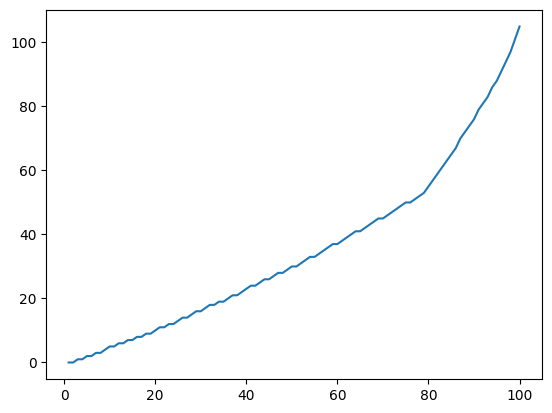

In [58]:
pourcentages = [i  for i in range(1, 101)]
prod_count = [calc_prod(sales_per_product, pourcentage)[1] for pourcentage  in pourcentages]
plt.plot(pourcentages, prod_count)

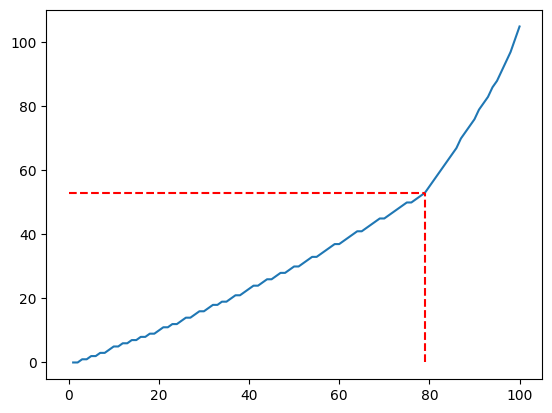

In [59]:
plt.plot(pourcentages, prod_count)
plt.vlines([79], 0, calc_prod(sales_per_product, 79)[1], colors='r',  linestyles='--')
plt.hlines([calc_prod(sales_per_product, 79)[1]], 0, 79, colors='r', linestyles='--')

In [60]:
top_sales_df = calc_prod(sales_per_product, 79)[0]
top_sales = list(top_sales_df.index)

In [61]:
filtered_data = data_without_outliers[data_without_outliers.PROD_NAME.isin(top_sales)]
filtered_data.to_csv('top_sales.csv', index=False)

In [62]:
filtered_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
121423,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken 134g,2,7.4,134,Pringles
112821,2018-07-01,199,199302,198907,23,Cheezels Cheese 330g,2,11.4,330,Cheezels
157284,2018-07-01,81,81292,81039,109,Pringles Barbeque 134g,2,7.4,134,Pringles
70888,2018-07-01,32,32062,28370,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,Infuzions
233674,2018-07-01,147,147113,146386,44,Thins Chips Light& Tangy 175g,2,6.6,175,Thins
...,...,...,...,...,...,...,...,...,...,...
22735,2019-06-30,186,186089,188493,109,Pringles Barbeque 134g,2,7.4,134,Pringles
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,175,Thins
231677,2019-06-30,84,84116,83704,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,Doritos
13810,2019-06-30,199,199117,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,Doritos


In [74]:
filtered_data['PROD_NAME'].nunique()


53

In [73]:
data_without_outliers['PROD_NAME'].nunique()

105